In [1]:
import Scribe as sc
from Scribe.Scribe import causal_net_dynamics_coupling as Scribe

import scanpy as sp

import numpy as np 

import networkx as nx 
nx.__version__

import matplotlib.pyplot as plt

# krumsiek11 = sp.read_h5ad('./krumsiek11_blobs.h5ad')
# krumsiek11.obs['dpt_groups'] = krumsiek11.obs['clusters']
# sc.pl.viz_response(krumsiek11,np.array([['Gata1','Fog1']]),grid_num=25) # 
# sc.pl.viz_causality(krumsiek11,np.array([['Pu.1','Gata1']]),grid_num=25)
# sc.pl.viz_comb_logic(krumsiek11,np.array([['Gata2','Gata1','Fog1'], ['Pu.1','Gata1','Fog1']]),grid_num=10)

'2.3'

In [2]:
import pandas as pd 
import numpy as np 

import dynamo as dyn 

new_RNA = pd.read_csv('/home/xqiu/proj/Aristotle/scSLAM_seq_data/NASC_seq/GSE128273_exp1_newcounts.csv', index_col=0, delimiter=',')
old_RNA = pd.read_csv('/home/xqiu/proj/Aristotle/scSLAM_seq_data/NASC_seq/GSE128273_exp1_oldcounts.csv', index_col=0, delimiter=',')
tot_RNA = pd.read_csv('/home/xqiu/proj/Aristotle/scSLAM_seq_data/NASC_seq/GSE128273_exp1_readcounts.csv', index_col=0, delimiter=',')

new_RNA.fillna(0, inplace=True)
old_RNA.fillna(0, inplace=True)
tot_RNA.fillna(0, inplace=True)


In [3]:
import mygene
mg = mygene.MyGeneInfo()
geneList = new_RNA.index.tolist()
geneSyms = mg.querymany(geneList , scopes='ensembl.gene', fields='symbol', species='human')

Ensemble_id = [cur_dict['query'] for cur_dict in geneSyms]
gene = [cur_dict['symbol'] if 'notfound' not in cur_dict.keys() else 'NA' for cur_dict in geneSyms]
FD = pd.DataFrame({'Ensemble_id': Ensemble_id, "gene_short_name": gene}, columns=['Ensemble_id', 'gene_short_name'])
FD = FD.set_index('Ensemble_id')

split_array = [new_RNA.columns.str.split('_', n=5)[i] for i in range(len(new_RNA.columns.str.split('_', n=5)))]
PD = pd.DataFrame(split_array, columns=['Plate', 'Well', 'Exp', 'CellType', '4sU'])
PD['cell_id'] = new_RNA.columns
PD = PD.set_index('cell_id')


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [4]:
from anndata import AnnData
adata_NASC_seq_1 = AnnData(tot_RNA.loc[FD.index.tolist(), :].values.T,
    obs = PD,
    var = FD, 
    layers=dict(
        unspliced=new_RNA.loc[FD.index.tolist(), :].values.T,
        spliced = tot_RNA.loc[FD.index.tolist(), :].values.T)) 
print(adata_NASC_seq_1)
print(adata_NASC_seq_1.obs.head())
print(adata_NASC_seq_1.var.head())

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 192 × 58429 
    obs: 'Plate', 'Well', 'Exp', 'CellType', '4sU'
    var: 'gene_short_name'
    layers: 'unspliced', 'spliced'
                           Plate Well   Exp CellType         4sU
cell_id                                                         
P1_A1_exp1_K562_unlabelled    P1   A1  exp1     K562  unlabelled
P1_A10_exp1_K562_60min4sU     P1  A10  exp1     K562    60min4sU
P1_A11_exp1_K562_60min4sU     P1  A11  exp1     K562    60min4sU
P1_A12_exp1_K562_60min4sU     P1  A12  exp1     K562    60min4sU
P1_A2_exp1_K562_unlabelled    P1   A2  exp1     K562  unlabelled
                gene_short_name
Ensemble_id                    
ENSG00000223972         DDX11L1
ENSG00000227232          WASH7P
ENSG00000278267       MIR6859-1
ENSG00000243485     MIR1302-2HG
ENSG00000284332       MIR1302-2


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/causal_network.py:18: UserWarning:  WARNING: No expression data argument given. if you intend to load the data from a file, call the method 'read_expression_file'.
  if expression==None: warnings.warn(" WARNING: No expression data argument given. if you intend to load the data from a file, call the method 'read_expression_file'.")


Create causal_model successfully


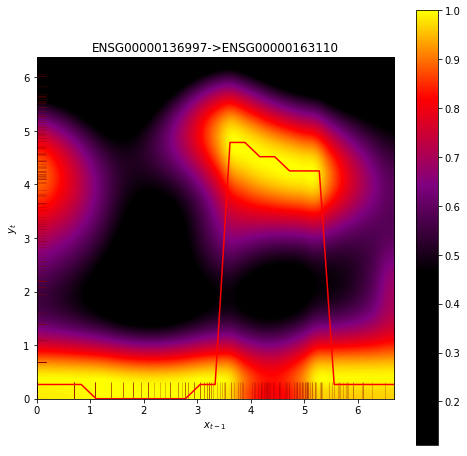

In [5]:
import Scribe as sc
adata_NASC_seq_1.var[adata_NASC_seq_1.var.gene_short_name.isin(['MYC','PDLIM5'])]
sc.pl.viz_response(adata_NASC_seq_1, np.array([['ENSG00000136997','ENSG00000163110']]),grid_num=25, log=True) # 


Create causal_model successfully


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/plot/heatmaps.py:394: RuntimeWarning: invalid value encountered in true_divide
  u = np.exp(-dist_mat[i, 1:] / np.min(dist_mat[i, 1:]))


f_ini_ind is  0   25


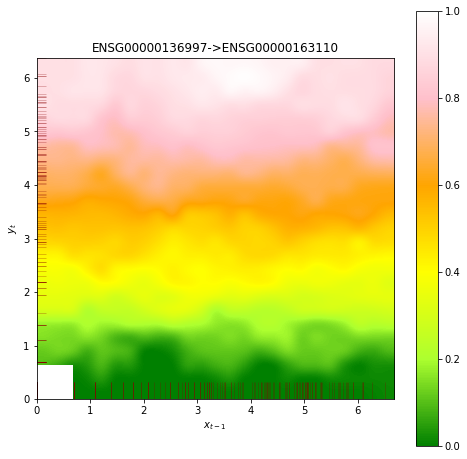

In [6]:
sc.pl.viz_causality(adata_NASC_seq_1,np.array([['ENSG00000136997','ENSG00000163110']]),grid_num=25, log=True)


In [7]:
adata_NASC_seq_1.var[adata_NASC_seq_1.var.gene_short_name.isin(['MYC','PDLIM5', 'GAPDH'])]


,gene_short_name
Ensemble_id,
ENSG00000163110,PDLIM5
ENSG00000136997,MYC
ENSG00000111640,GAPDH


Create causal_model successfully


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/plot/heatmaps.py:551: RuntimeWarning: invalid value encountered in true_divide
  u = np.exp(-dist_mat[i, 1:] / np.min(dist_mat[i, 1:]))


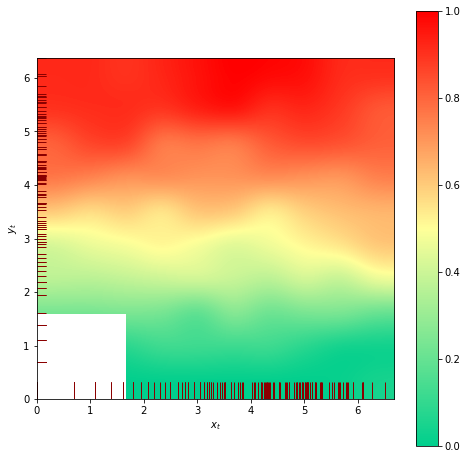

In [8]:
sc.pl.viz_comb_logic(adata_NASC_seq_1,np.array([['ENSG00000136997','ENSG00000163110', 'ENSG00000111640']]),grid_num=10, log=True)


In [9]:
sp.pp.recipe_zheng17(adata_NASC_seq_1, n_top_genes=25) #, min_counts=15, min_counts_u=10, n_top_genes=2500 n_top_genes can be tuned 
Scribe(adata_NASC_seq_1, t0_key='spliced', t1_key='unspliced')


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [10]:
df_mat = adata_NASC_seq_1.uns['causal_net']
ind_mat = np.where(df_mat.values - df_mat.T.values < 0)

tmp = np.where(df_mat.values - df_mat.T.values < 0)

for i in range(len(tmp[0])): 
    df_mat.iloc[tmp[0][i], tmp[1][i]] = np.nan

df_mat = df_mat.stack().reset_index()
df_mat.columns = ['source', 'target', 'weight']
# df_mat = df_mat.iloc[df_mat['weight'] is not np.nan, :]

In [13]:
df_mat.head()

,source,target,weight
0,ENSG00000182866,ENSG00000162849,-0.003345
1,ENSG00000182866,ENSG00000128656,-0.001261
2,ENSG00000182866,ENSG00000274752,-0.002413
3,ENSG00000182866,ENSG00000169249,-0.015646
4,ENSG00000182866,ENSG00000281383,0.018659


In [14]:
df_mat.source = FD.loc[df_mat.source, 'gene_short_name'].tolist()
df_mat.target = FD.loc[df_mat.target, 'gene_short_name'].tolist()


G = nx.from_pandas_edgelist(df_mat, source='source', target='target', edge_attr='weight', create_using=nx.DiGraph())
G.nodes()
W = []
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        W.append(eattr['weight'])
        
W[:10]

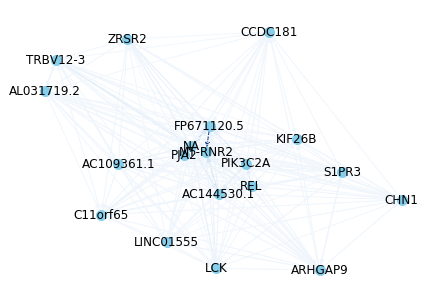

In [17]:
 
# Build a dataframe with your connections
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
# df=df.reindex(G.nodes())
 
# Plot it, providing a continuous color scale with cmap:
# df_mat['weight'].tolist()
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, edge_color=W, width=1.0, edge_cmap=plt.cm.Blues)